## Code and Output

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
import imageio

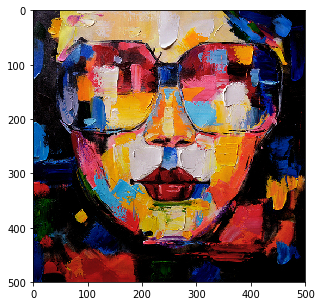

In [2]:
photo_data = imageio.imread('.\Desktop\datasets\k_means_clustering.jpg')
plt.figure(figsize = (10,5))
plt.imshow(photo_data)

In [3]:
print(photo_data.shape, type(photo_data))

(500, 500, 3) <class 'imageio.core.util.Array'>


In [4]:
photo_data = np.array(photo_data)
old_photo_shape = photo_data.shape

In [5]:
photo_data = photo_data.reshape(old_photo_shape[0] * old_photo_shape[1], old_photo_shape[2])
new_photo_shape = photo_data.shape

In [6]:
class KMeansClustering:
    def __init__ (self, K = 10):
        self.K = K
    
    def findClosestCentroids (self, X, centroids):
        values = np.full((X.shape[0]), 5)
        idx = np.zeros((X.shape[0]), dtype = int)
        for i in range(X.shape[0]): 
            value = 1000000
            for k in range (self.K):
                cur_idx = sum((X[i] - centroids[k]) * (X[i] - centroids[k]))
                if (cur_idx < value) :
                    value = cur_idx
                    idx[i] = k
        return idx
    
    def computeCentroids (self, X, centroids):
        idx = self.findClosestCentroids(X, centroids)
        cent = np.zeros(centroids.shape)
        for k in range(self.K):
            points_idx = (idx == k)
            points = X[points_idx]
            cent[k] = points.sum(axis = 0) / points.shape[0]
        return cent
    
    def fit (self, X, centroids, max_iter = 1):
        for iter in range(max_iter):
            centroids = self.computeCentroids(X, centroids)
        return centroids
        

In [7]:
K = 6
max_iter = 10
kMeans = KMeansClustering(K)
indices = np.random.randint(0, new_photo_shape[0], K)
centroids = photo_data[indices]

In [8]:
cent = kMeans.findClosestCentroids(photo_data, centroids)
np.bincount(cent).shape

(6,)

In [9]:
centroids = kMeans.fit(photo_data, centroids, max_iter)

In [10]:
closest = kMeans.findClosestCentroids(photo_data, centroids)
np.bincount(closest)

array([31246, 80723, 45835, 20964, 40039, 31193], dtype=int64)

In [11]:
compressed_photo = np.zeros(new_photo_shape)
cent = np.clip(centroids.astype('uint8'), 0, 255)
for k in range (K) :
    compressed_photo[closest == k] = cent[k]
compressed_photo = compressed_photo.reshape(old_photo_shape[0], old_photo_shape[1], old_photo_shape[2])
compressed_photo = np.array(compressed_photo, dtype = int)
photo_data = photo_data.reshape(old_photo_shape[0], old_photo_shape[1], old_photo_shape[2])

Text(0.5, 1.0, 'Compressed Photo')

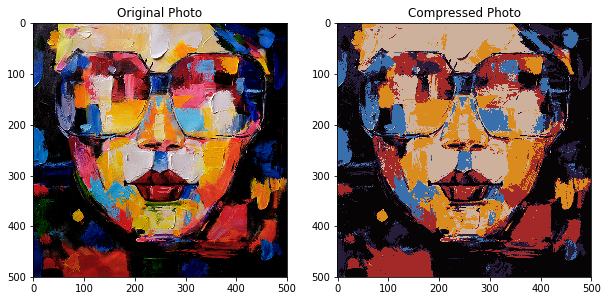

In [12]:
fig, ax = plt.subplots(1, 2, figsize = (10, 10))
ax[0].imshow(photo_data)
ax[0].set_title('Original Photo')
ax[1].imshow(compressed_photo)
ax[1].set_title('Compressed Photo')